# Imports

In [ ]:
!pip install ale-py
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 16.8 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import ale_py
import numpy as np
import matplotlib.pyplot as plt

# Partie 1: Frozen Lake

Nous allons commencer notre TP avec un environnement type grille: le [Frozen Lake](https://gymnasium.farama.org/environments/toy_text/frozen_lake). Cela vous aidera également à vous familiariser avec l'API Gym, largement utilisée de le monde du RL.

Commencez par lire la [documentation](https://gymnasium.farama.org/environments/toy_text/frozen_lake) de l'environnement Frozen Lake.

## Print utils

In [ ]:
def int_action_to_str(int_action):
    if int_action == 0:
        return "left"
    if int_action == 1:
        return "down"
    if int_action == 2:
        return "right"
    else:
      return "up"

In [ ]:
def print_values(values, grid_width):
    for i in range(int(len(values)/grid_width)):
        print(values[i*grid_width:(i+1)*grid_width])

def print_policy(policy, grid_width):
    for i in range(int(len(policy)/grid_width)):
        print([int_action_to_str(_a) for _a in policy[i*grid_width:(i+1)*grid_width]])

In [ ]:
def print_q_values(q_values, grid_width):
    for i in range(int(len(q_values)/grid_width)):
        _q_values_to_print = []
        for _q_values in q_values[i*grid_width:(i+1)*grid_width]:
            _q_values_to_print.append({int_action_to_str(_k): _v for _k, _v in enumerate(_q_values)})
        print(_q_values_to_print)

## A) Version déterministe

Créons une première instance de l'environnement avec une carte spécifique:

In [ ]:
env = gym.make('FrozenLake-v1', desc=["SFFF", "FHFH", "FFFH", "HFFG"], is_slippery=False, render_mode="rgb_array")

Il est nécessaire de reset l'environnement pour lancer un épisode:

In [ ]:
observation, info = env.reset()

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
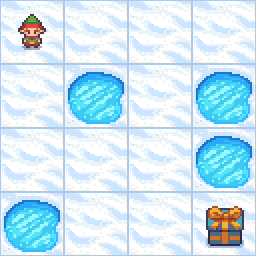

In [ ]:
env.render()

Regardez la fonction de transition:

In [ ]:
def print_transition_function(env, state, action, ):
    print(f"From state {state} when playing action {action}:")
    for next_state_transition in env.unwrapped.P[state][action]:
        print(f"- Reaching state {next_state_transition[1]} along with reward {next_state_transition[2]} with probability {next_state_transition[0]}")

In [ ]:
# State: initial
# Action: right
print_transition_function(env, state=0, action=2)

From state 0 when playing action 2:
- Reaching state 1 along with reward 0.0 with probability 1.0


In [ ]:
# State: cell 4 (next ot a hole)
# Action: right
print_transition_function(env, state=4, action=2)

From state 4 when playing action 2:
- Reaching state 5 along with reward 0.0 with probability 1.0


In [ ]:
# State: cell 14 (next to the goal)
# Action: right
print_transition_function(env, state=14, action=2)

From state 14 when playing action 2:
- Reaching state 15 along with reward 1.0 with probability 1.0


Codez désormais une stratégie permettant de résoudre le maze:

In [ ]:
observation, info = env.reset()
done, truncated = False, False
reward = 0
while not (done or truncated):
    # action = <your code>
    if observation in [0, 4, 10]:
        action = 1
    else:
        action = 2
    observation, reward, done, truncated, info = env.step(action)

assert reward == 1

Testez à nouveau votre stratégie avec cette nouvelle carte. Que fait-elle ?

In [ ]:
env = gym.make('FrozenLake-v1', desc=["SHFF", "FHFH", "FFHF", "FFFG"], is_slippery=False, render_mode="rgb_array")
observation, info = env.reset()
env.render()
done, truncated = False, False
reward = 0
while not (done or truncated):
    if observation in [0, 4, 8]:
        action = 1
    else:
        action = 2
    observation, reward, done, truncated, info = env.step(action)

assert reward == 1

## B) Version stochastique

Passons maintenant à une verison sotchastique où notre agent peut "glisser".

In [ ]:
env = gym.make('FrozenLake-v1', desc=["SFFF", "FHFH", "FFFH", "HFFG"], is_slippery=True, render_mode="rgb_array")

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
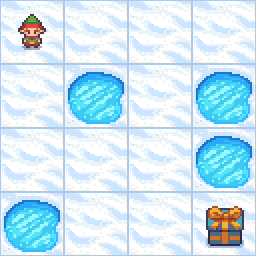

In [ ]:
observation, info = env.reset()
env.render()

Regardons ce que cela change sur la fonction de transition:

In [ ]:
# State: initial
# Action: right
print_transition_function(env, state=0, action=2)

From state 0 when playing action 2:
- Reaching state 4 along with reward 0.0 with probability 0.3333333333333333
- Reaching state 1 along with reward 0.0 with probability 0.3333333333333333
- Reaching state 0 along with reward 0.0 with probability 0.3333333333333333


In [ ]:
# State: cell 4 (next ot a hole)
# Action: right
print_transition_function(env, state=4, action=2)

From state 4 when playing action 2:
- Reaching state 8 along with reward 0.0 with probability 0.3333333333333333
- Reaching state 5 along with reward 0.0 with probability 0.3333333333333333
- Reaching state 0 along with reward 0.0 with probability 0.3333333333333333


In [ ]:
# State: cell 14 (next to the goal)
# Action: right
print_transition_function(env, state=14, action=2)

From state 14 when playing action 2:
- Reaching state 14 along with reward 0.0 with probability 0.3333333333333333
- Reaching state 15 along with reward 1.0 with probability 0.3333333333333333
- Reaching state 10 along with reward 0.0 with probability 0.3333333333333333


Essayez maintenant de trouver une stratégie sûre pour la carte suivante:

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
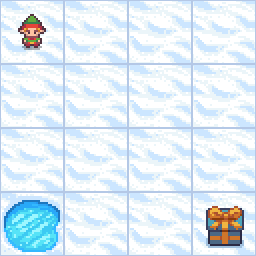

In [ ]:
env = gym.make('FrozenLake-v1', desc=["SFFF", "FFFF", "FFFF", "HFFG"], is_slippery=True, render_mode="rgb_array")
observation, info = env.reset()
env.render()

In [ ]:
print_transition_function(env, state=8, action=1)

From state 8 when playing action 1:
- Reaching state 8 along with reward 0.0 with probability 0.3333333333333333
- Reaching state 12 along with reward 0.0 with probability 0.3333333333333333
- Reaching state 9 along with reward 0.0 with probability 0.3333333333333333


Votre stratégie sera testée plusieurs fois pour s'assurer de sa fiabilité.

In [ ]:
for i in range(5):
  observation, info = env.reset()
  done, truncated = False, False
  reward = 0
  while not (done or truncated):
      # action = <your code>
      if observation in [3, 7, 11]: #[0, 4, 8]:
          action = 1
      else:
          action = 2
      observation, reward, done, truncated, info = env.step(action)

  assert reward == 1

# Partie 2: Dynamic Programming

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
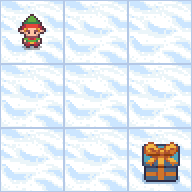

In [ ]:
env = gym.make('FrozenLake-v1', desc=["SFF", "FFF", "FFG"], is_slippery=False, render_mode="rgb_array")
observation, info = env.reset()
env.render()

## A) Policy Iteration

Commençons par implémenter la méthode de Policy Iteration:

In [ ]:
def policy_iteration(env, gamma=0.99):
    values = np.zeros(env.observation_space.n)
    policy = np.zeros(env.observation_space.n, dtype=np.int16)

    values_list = [values.copy()]
    policy_list = [policy.copy()]

    converged = False
    actions = list(range(env.action_space.n))
    states = list(env.unwrapped.P.keys())
    rewards = {}
    terminal_states = []
    for s in env.unwrapped.P:
        for a in env.unwrapped.P[s]:
            for s_prime in env.unwrapped.P[s][a]:
                if s_prime[1] not in rewards:
                  rewards[s_prime[1]] = s_prime[2]
                if s_prime[3] and s_prime[1] not in terminal_states:
                    terminal_states.append(s_prime[1])

    while not converged:
        # Step 1 : Policy Evaluation
        for s in states:
            if s in terminal_states:
                values[s] = rewards[s]
            else :
                current_policy_action = policy[s]
                sum = 0
                for s_prime in env.unwrapped.P[s][current_policy_action]:
                    sum = sum +  s_prime[0]*values[s_prime[1]]
                values[s] = rewards[s] + gamma*sum


        # Step 2 : Policy Improvement
        for s in states:
            _values = []
            for a in actions:
                sum = 0
                for s_prime in env.unwrapped.P[s][a]:
                    sum = sum + s_prime[0]*values[s_prime[1]]
                _values.append(rewards[s] + gamma*sum)
            policy[s] = np.argmax(_values)

        values_list.append(values.copy())
        policy_list.append(policy.copy())

        # Check the convergence
        if np.array_equal(values_list[-1],values_list[-2]) :
            converged = True

    return [values_list, policy_list]

In [ ]:
values_list, policy_list = policy_iteration(env)
for _values, _policy in zip(values_list, policy_list):
    print("Values:")
    print_values(_values, grid_width=3)
    print("Policy:")
    print_policy(_policy, grid_width=3)

Values:
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
Policy:
['left', 'left', 'left']
['left', 'left', 'left']
['left', 'left', 'left']
Values:
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 1.]
Policy:
['left', 'left', 'left']
['left', 'left', 'down']
['left', 'right', 'left']
Values:
[0. 0. 0.]
[0.   0.   0.99]
[0.   0.99 1.  ]
Policy:
['left', 'left', 'down']
['left', 'down', 'down']
['right', 'right', 'left']
Values:
[0.     0.     0.9801]
[0.     0.9801 0.99  ]
[0.9801 0.99   1.    ]
Policy:
['left', 'down', 'down']
['down', 'down', 'down']
['right', 'right', 'left']
Values:
[0.       0.970299 0.9801  ]
[0.970299 0.9801   0.99    ]
[0.9801 0.99   1.    ]
Policy:
['down', 'down', 'down']
['down', 'down', 'down']
['right', 'right', 'left']
Values:
[0.96059601 0.970299   0.9801    ]
[0.970299 0.9801   0.99    ]
[0.9801 0.99   1.    ]
Policy:
['down', 'down', 'down']
['down', 'down', 'down']
['right', 'right', 'left']
Values:
[0.96059601 0.970299   0.9801    ]
[0.970299 0.9801   0.99    ]
[0.9801 0.99   1.    ]
Po

## B) Value Iteration

A votre tour pour la value iteration !

In [ ]:
def value_iteration(env, gamma=0.99):
    policy = np.zeros(env.observation_space.n, dtype=np.int16)
    values = np.zeros(env.observation_space.n)
    values_list = [values.copy()]

    converged = False
    actions = list(range(env.action_space.n))
    states = list(env.unwrapped.P.keys())
    rewards = {}
    terminal_states = []
    for s in env.unwrapped.P:
        for a in env.unwrapped.P[s]:
            for s_prime in env.unwrapped.P[s][a]:
                if s_prime[1] not in rewards:
                  rewards[s_prime[1]] = s_prime[2]
                if s_prime[3] and s_prime[1] not in terminal_states:
                    terminal_states.append(s_prime[1])

    while not converged:
        # <your code>
        # Step 1 : Greedy Policy Evaluation
        for s in states:
            if s in terminal_states:
                values[s] = rewards[s]
            else :
                _values = []
                for a in actions:
                    sum = 0
                    for s_prime in env.unwrapped.P[s][a]:
                        sum = sum +  s_prime[0]*values[s_prime[1]]
                    _values.append(rewards[s] + gamma*sum)
                values[s] = np.max(_values)

        values_list.append(values.copy())

        # Check the convergence
        if np.array_equal(values_list[-1],values_list[-2]) :
            converged = True

    # Final step: construct the policy
    # <your code>
    for s in states:
            _values = []
            for a in actions:
                sum = 0
                for s_prime in env.unwrapped.P[s][a]:
                    sum = sum + s_prime[0]*values[s_prime[1]]
                _values.append(rewards[s] + gamma*sum)
            policy[s] = np.argmax(_values)
    return [values_list, policy]

In [ ]:
values_list, policy = value_iteration(env)
for _values in values_list:
    print("Values:")
    print_values(_values, grid_width=3)

print("Policy:")
print_policy(policy, grid_width=3)

Values:
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
Values:
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 1.]
Values:
[0. 0. 0.]
[0.   0.   0.99]
[0.   0.99 1.  ]
Values:
[0.     0.     0.9801]
[0.     0.9801 0.99  ]
[0.9801 0.99   1.    ]
Values:
[0.       0.970299 0.9801  ]
[0.970299 0.9801   0.99    ]
[0.9801 0.99   1.    ]
Values:
[0.96059601 0.970299   0.9801    ]
[0.970299 0.9801   0.99    ]
[0.9801 0.99   1.    ]
Values:
[0.96059601 0.970299   0.9801    ]
[0.970299 0.9801   0.99    ]
[0.9801 0.99   1.    ]
Policy:
['down', 'down', 'down']
['down', 'down', 'down']
['right', 'right', 'left']


# Partie 3: Q-Learning

## A) No Holes

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
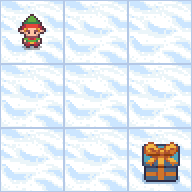

In [ ]:
env = gym.make('FrozenLake-v1', desc=["SFF", "FFF", "FFG"], is_slippery=False, render_mode="rgb_array")
observation, info = env.reset()
env.render()

In [ ]:
def sarsa(env, num_episodes=2000, epsilon=0.1, gamma=0.99, alpha=0.8, reward_on_hole=0, grid_width=3):
    q_table = np.zeros((env.observation_space.n, env.action_space.n), dtype=np.float32)
    for i in range(num_episodes):
        state, info = env.reset()
        done, truncated = False, False
        _return = 0
        # Sample the first action
        if np.random.rand(1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])
        while not (done or truncated):
            # Play the action
            next_state, reward, done, truncated, info = env.step(action)
            _return += reward

            # Sample the next action
            if np.random.rand(1) < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])

            # Update Q-Table with new knowledge
            if not (done or truncated):
                # td_error = <your code>
                # q_table[state, action] = <your code>
                td_error = reward + gamma*q_table[next_state, next_action] - q_table[state, action]
                q_table[state, action] = q_table[state, action] + alpha*td_error
                state = next_state
                action = next_action
            else:
                if reward == 0 and not truncated:  # Fell in a hole
                    reward = reward_on_hole
                # td_error = <your code>
                # q_table[state, action] = <your code>
                td_error = reward - q_table[state, action]
                q_table[state, action] = q_table[state, action] + alpha*td_error

        print(f"Obtained return {_return} at episode {i}")

    print_q_values(q_table, grid_width=grid_width)

In [ ]:
sarsa(env, num_episodes=2000, epsilon=0.1, grid_width=3)

Obtained return 0.0 at episode 0
Obtained return 0.0 at episode 1
Obtained return 0.0 at episode 2
Obtained return 0.0 at episode 3
Obtained return 0.0 at episode 4
Obtained return 0.0 at episode 5
Obtained return 0.0 at episode 6
Obtained return 0.0 at episode 7
Obtained return 0.0 at episode 8
Obtained return 0.0 at episode 9
Obtained return 0.0 at episode 10
Obtained return 0.0 at episode 11
Obtained return 0.0 at episode 12
Obtained return 0.0 at episode 13
Obtained return 0.0 at episode 14
Obtained return 0.0 at episode 15
Obtained return 0.0 at episode 16
Obtained return 0.0 at episode 17
Obtained return 0.0 at episode 18
Obtained return 0.0 at episode 19
Obtained return 0.0 at episode 20
Obtained return 0.0 at episode 21
Obtained return 0.0 at episode 22
Obtained return 0.0 at episode 23
Obtained return 0.0 at episode 24
Obtained return 0.0 at episode 25
Obtained return 0.0 at episode 26
Obtained return 0.0 at episode 27
Obtained return 0.0 at episode 28
Obtained return 0.0 at e

In [ ]:
def q_learning(env, num_episodes=2000, epsilon=0.1, gamma=0.99, alpha=0.8, reward_on_hole=0, grid_width=3):
    q_table = np.zeros((env.observation_space.n, env.action_space.n), dtype=np.float32)
    for i in range(num_episodes):
        state, info = env.reset()
        done, truncated = False, False
        _return = 0
        # Sample the first action
        if np.random.rand(1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])
        while not (done or truncated):
            # Play the action
            next_state, reward, done, truncated, info = env.step(action)
            _return += reward

            # Sample the next action
            if np.random.rand(1) < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])

            # Update Q-Table with new knowledge
            if not (done or truncated):
                # td_error = <your code>
                # q_table[state, action] = <your code>
                td_error = reward + gamma*np.max(q_table[next_state, :]) - q_table[state, action]
                q_table[state, action] = q_table[state, action] + alpha*td_error
                state = next_state
                action = next_action
            else:
                if reward == 0 and not truncated:  # Fell in a hole
                    reward = reward_on_hole
                # td_error = <your code>
                # q_table[state, action] = <your code>
                td_error = reward - q_table[state, action]
                q_table[state, action] = q_table[state, action] + alpha*td_error

        print(f"Obtained return {_return} at episode {i}")

    print_q_values(q_table, grid_width=grid_width)

In [ ]:
q_learning(env, num_episodes=2000, epsilon=0.1, grid_width=3)

Obtained return 0.0 at episode 0
Obtained return 0.0 at episode 1
Obtained return 0.0 at episode 2
Obtained return 0.0 at episode 3
Obtained return 0.0 at episode 4
Obtained return 0.0 at episode 5
Obtained return 0.0 at episode 6
Obtained return 0.0 at episode 7
Obtained return 0.0 at episode 8
Obtained return 0.0 at episode 9
Obtained return 0.0 at episode 10
Obtained return 0.0 at episode 11
Obtained return 0.0 at episode 12
Obtained return 0.0 at episode 13
Obtained return 0.0 at episode 14
Obtained return 0.0 at episode 15
Obtained return 0.0 at episode 16
Obtained return 0.0 at episode 17
Obtained return 0.0 at episode 18
Obtained return 0.0 at episode 19
Obtained return 0.0 at episode 20
Obtained return 1.0 at episode 21
Obtained return 0.0 at episode 22
Obtained return 0.0 at episode 23
Obtained return 0.0 at episode 24
Obtained return 1.0 at episode 25
Obtained return 0.0 at episode 26
Obtained return 1.0 at episode 27
Obtained return 1.0 at episode 28
Obtained return 1.0 at e

## B) Holes

Essayons maintenant de reproduire l'exemple "The Cliff" du cours.

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
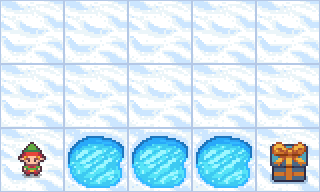

In [ ]:
env = gym.make('FrozenLake-v1', desc=["FFFFF", "FFFFF", "SHHHG"], is_slippery=False, render_mode="rgb_array")
observation, info = env.reset()
env.render()

In [ ]:
sarsa(env, num_episodes=20000, epsilon=0.33, reward_on_hole=-1, grid_width=5)

In [ ]:
q_learning(env, num_episodes=20000, epsilon=0.33, reward_on_hole=-1, grid_width=5)

# Partie 4: DQN

Il est temps de passer à un environnnement plus compliqué: Pong.

Observation space: Box(0, 255, (210, 160, 3), uint8)
Action space: Discrete(6)
Actions' meaning: ['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']


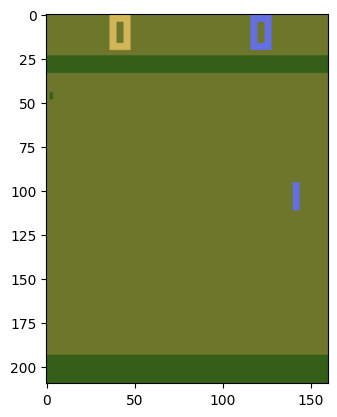

In [ ]:
pong = gym.make("PongNoFrameskip-v4", render_mode="rgb_array")
print("Observation space:", pong.observation_space)
print("Action space:", pong.action_space)
print(f"Actions' meaning: {pong.unwrapped.get_action_meanings()}")
s,_ = pong.reset()
plt.imshow(pong.render(),vmin=0,vmax=255);

Nous allons utiliser des wrappers déjà fournis par Gymnasium pour:
- processer l'image (réduire sa taille, tout mettre en gris...)
- stacker les N dernières images (permettant de tracker le mouvement des objets)

In [ ]:
from gymnasium.wrappers import AtariPreprocessing, FrameStackObservation

In [ ]:
pong = AtariPreprocessing(pong)
pong = FrameStackObservation(pong, 4)

shape: (4, 84, 84), min = 52, max = 236, dtype = uint8


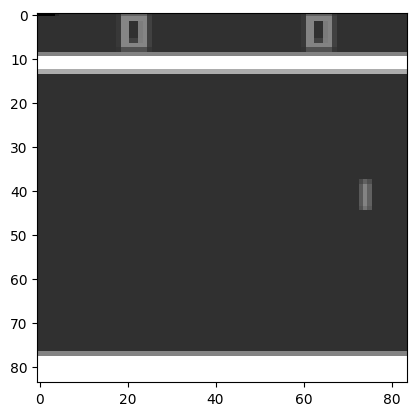

In [ ]:
# Trying a random agent in Pong
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

_,_ = pong.reset()
for i in range(10):
    a = np.random.randint(2)
    x, r, _, _, _ = pong.step(a)
print("shape: ", x.shape, ", min = ", x.min(), ", max = ", x.max(), ", dtype = ", x.dtype, sep='')
plt.imshow(x[0], cmap='gray')

## A) Replay Buffer

Implémentons ensuite notre replay buffer permettant de sampler aléatoirement des transitions collectées.

In [ ]:
import random
import torch
import numpy as np

class ReplayBuffer:
    def __init__(self, capacity, device):
        self.capacity = capacity # capacity of the buffer
        self.data = []
        self.index = 0 # index of the next cell to be filled
        self.device = device
    def append(self, s, a, r, s_, d):
        if len(self.data) < self.capacity:
            self.data.append(None)
        self.data[self.index] = (s, a, r, s_, d)
        self.index = (self.index + 1) % self.capacity
    def sample(self, batch_size):
        batch = random.sample(self.data, batch_size)
        return list(map(lambda x:torch.Tensor(np.array(x)).to(self.device), list(zip(*batch))))
    def __len__(self):
        return len(self.data)

## DQN

Implémentons maintenant un DQN avec trois couches de convolutions:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class AtariCNN(nn.Module):
    def __init__(self, in_channels=4, n_actions=6):
        super(AtariCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 32, kernel_size=8, stride=4)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1)
        self.fc4 = nn.Linear(7 * 7 * 64, 512)
        self.head = nn.Linear(512, n_actions)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.fc4(x.view(x.size(0), -1)))
        return self.head(x)

A votre tour d'implémenter une fonction calculant les Q-values pour un state et jouant greedy à partir de ces Q-values (i.e. retournant l'index de la plus haute Q-value):

In [ ]:
def greedy_action(network, state):
    device = "cuda" if next(network.parameters()).is_cuda else "cpu"
    with torch.no_grad():
        # return <your code>
        Q = network(torch.Tensor(state).unsqueeze(0).to(device))
        return torch.argmax(Q).item()

Testons votre fonction:

In [ ]:
state,_ = pong.reset()
pong_dqn = AtariCNN()
greedy_action(pong_dqn, state)

1

## C) Entraînement

Il est temps d'implémenter l'entraînement de notre DQN.
Nous allons utiliser:
- une exploration epsilon-greedy avec un epsilon qui décroît
- un target Q-network pour stabiliser les td errors

C'est à vous d'implémenter la méthode `gradient_step` qui met à jour le DQN :)

In [ ]:
from copy import deepcopy

class DQNAgent:
    def __init__(self, config, model):
        # Set all parameters
        device = "cuda" if next(model.parameters()).is_cuda else "cpu"
        self.nb_actions = config['nb_actions']
        self.gamma = config['gamma'] if 'gamma' in config.keys() else 0.95

        ## Train every N steps
        self.train_freq = config['train_freq'] if 'train_freq' in config.keys() else 1
        self.train_warmup = config['train_warmup'] if 'train_warmup' in config.keys() else 1

        ## Replay Buffer
        ### Number of transitions to sample when training
        self.batch_size = config['batch_size'] if 'batch_size' in config.keys() else 100
        buffer_size = config['buffer_size'] if 'buffer_size' in config.keys() else int(1e5)
        self.memory = ReplayBuffer(buffer_size,device)

        ## Epsilon-greedy strategy
        self.epsilon_max = config['epsilon_max'] if 'epsilon_max' in config.keys() else 1.
        self.epsilon_min = config['epsilon_min'] if 'epsilon_min' in config.keys() else 0.01
        self.epsilon_stop = config['epsilon_decay_period'] if 'epsilon_decay_period' in config.keys() else 1000
        self.epsilon_delay = config['epsilon_delay_decay'] if 'epsilon_delay_decay' in config.keys() else 20
        self.epsilon_step = (self.epsilon_max-self.epsilon_min)/self.epsilon_stop

        ## DQN and target DQN
        self.model = model
        self.target_model = deepcopy(self.model).to(device)

        ## Loss / learning rate / optimizer
        self.criterion = config['criterion'] if 'criterion' in config.keys() else torch.nn.MSELoss()
        lr = config['learning_rate'] if 'learning_rate' in config.keys() else 0.001
        self.optimizer = config['optimizer'] if 'optimizer' in config.keys() else torch.optim.Adam(self.model.parameters(), lr=lr)

        ## Number of gradient steps to perform on each batch sampled from the replay buffer
        self.nb_gradient_steps = config['gradient_steps'] if 'gradient_steps' in config.keys() else 1

        ## Parameter to update the target DQN with a moving average (Polyak average)
        self.update_target_tau = config['update_target_tau'] if 'update_target_tau' in config.keys() else 0.005

    def gradient_step(self):
        if len(self.memory) > self.batch_size:
            self.optimizer.zero_grad()
            S, A, R, next_S, D = self.memory.sample(self.batch_size)
            # loss = <your code>
            with torch.no_grad():
                Q_next_S_max = self.target_model(next_S).max(1)[0].detach()

            td_objective = R + self.gamma*Q_next_S_max*(1-D)
            Q_to_update = self.model(S).gather(1, A.to(torch.long).unsqueeze(1))
            loss = self.criterion(Q_to_update, td_objective.unsqueeze(1))
            loss.backward()
            self.optimizer.step()

    def train(self, env, max_episode):
        episode_return = []
        episode = 0
        episode_cum_reward = 0
        state, _ = env.reset()
        epsilon = self.epsilon_max
        step = 0
        while episode < max_episode:
            # update epsilon
            if step > self.epsilon_delay:
                epsilon = max(self.epsilon_min, epsilon-self.epsilon_step)
            # select epsilon-greedy action
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = greedy_action(self.model, state)

            # step
            next_state, reward, done, trunc, _ = env.step(action)
            # record transition in replay buffer
            self.memory.append(state, action, reward, next_state, done or trunc)
            episode_cum_reward += reward

            # train
            if step > self.train_warmup and step % self.train_freq == 0:
                for _ in range(self.nb_gradient_steps):
                    self.gradient_step()

                # update target network with Polyak average
                target_state_dict = self.target_model.state_dict()
                model_state_dict = self.model.state_dict()
                tau = self.update_target_tau
                for key in model_state_dict:
                    target_state_dict[key] = tau*model_state_dict[key] + (1-tau)*target_state_dict[key]
                self.target_model.load_state_dict(target_state_dict)

            # next transition
            step += 1
            if done or trunc:
                episode += 1
                print("Episode ", '{:3d}'.format(episode),
                      ", steps ", '{:3d}'.format(step),
                      ", epsilon ", '{:6.2f}'.format(epsilon),
                      ", buffer size ", '{:5d}'.format(len(self.memory)),
                      ", episode return ", '{:4.1f}'.format(episode_cum_reward),
                      sep='')
                state, _ = env.reset()
                episode_return.append(episode_cum_reward)
                episode_cum_reward = 0
            else:
                state = next_state
        return episode_return

C'est parti pour lancer l'entraînement de notre DQN !

In [ ]:
# Declare network
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

state_dim = pong.observation_space.shape[0]
n_action = pong.action_space.n
nb_neurons=24

DQN = AtariCNN()

# DQN config
config = {'nb_actions': pong.action_space.n,
          'train_warmup': 1000,
          'train_freq': 10,
          'gradient_steps': 1,
          'learning_rate': 0.001,
          'gamma': 0.95,
          'buffer_size': 100000,
          'epsilon_min': 0.1,
          'epsilon_max': 1.,
          'epsilon_decay_period': 10000,
          'epsilon_delay_decay': 0,
          'batch_size': 64}

# Train agent
agent = DQNAgent(config, DQN)
scores = agent.train(pong, 2000)
plt.plot(scores);

Episode   1, steps 847, epsilon   0.92, buffer size   847, episode return -21.0
Episode   2, steps 1870, epsilon   0.83, buffer size  1870, episode return -20.0
Episode   3, steps 2784, epsilon   0.75, buffer size  2784, episode return -19.0
Episode   4, steps 3541, epsilon   0.68, buffer size  3541, episode return -21.0
Episode   5, steps 4434, epsilon   0.60, buffer size  4434, episode return -20.0
Episode   6, steps 5259, epsilon   0.53, buffer size  5259, episode return -21.0
Episode   7, steps 6306, epsilon   0.43, buffer size  6306, episode return -20.0
Episode   8, steps 7068, epsilon   0.36, buffer size  7068, episode return -21.0
Episode   9, steps 7975, epsilon   0.28, buffer size  7975, episode return -21.0
Episode  10, steps 8919, epsilon   0.20, buffer size  8919, episode return -21.0
Episode  11, steps 9874, epsilon   0.11, buffer size  9874, episode return -19.0
Episode  12, steps 10839, epsilon   0.10, buffer size 10839, episode return -19.0
Episode  13, steps 11875, ep